# **Project 2**, APS1070 Fall 2020
**Anomaly Detection Algorithm using Gaussian Mixture Model [20 Marks]**

**Deadline: Oct 18, 23:59 - 20 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Name: Kangni Wang
*   Student Number: 1006783562

##**Part 1: Getting started** [4 Marks]

We are going to work with a credit card fraud dataset. This dataset contains 28 key features, which are not 
directly interpretable but contain meaningful information about the dataset.

Load the dataset in CSV file using Pandas. The dataset is called `creditcard.csv`. Print out the first few columns of the dataset.

* How many rows are there? _____ **[0.25]**
* What features in the dataset are present aside from the 28 main features?  _____ **[0.25]**
* Which column contains the targets? **[0.25]**
* To what do the target values correspond?_____ **[0.25]**

In [5]:
# Answers:
print('How many rows are there? There are', df.shape[0], 'in total')
print('What features in the dataset are present aside from the 28 main features? Columns with names "Time", "Amount"')
print('Which column contains the targets? column "class" contains target')
print('To what do the target values correspond? "1" represent fraud, "0" represent non-fraud')

How many rows are there? There are 284807 in total
What features in the dataset are present aside from the 28 main features? Columns with names "Time", "Amount"
Which column contains the targets? column "class" contains target
To what do the target values correspond? "1" represent fraud, "0" represent non-fraud


In [1]:
pip install wget

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=00958312b68a759b425bed92f417892f1ca9a4f6695601757bedd6ff0ff68fc2
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [2]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [3]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


It's important when looking at a new dataset to figure out how many examples we have for each class.

* What is the percentage of entries in the dataset for each class? _____ **[0.5]**
* Is this data considered balanced or unbalanced? Why is this the case?_____ **[0.5]**
* Why is balance/imbalance important? How might this class ditribution affect a KNN classifier for example, which we explored in Project 1? _____ **[0.5]**



In [6]:
# Answers:
print('Q1: What is the percentage of entries in the dataset for each class?')
print('There are', round((len(df[df['Class'] == 1])/df.shape[0])*100, 4), '% of data classifed as class "1"')
print('There are', round((len(df[df['Class'] == 0])/df.shape[0])*100, 4), '% of data classified as class "0"')
print('Q2: Is this data considered balanced or unbalanced? Why is this the case?')
print('The dataset is highly imblanced, since there will be more legitimate transaction when compared with a fraudulent one.')
print('Q3: Why is balance/imbalance important?')
print(' When the data is heavily imbalanced, the algorithm will start to make predictions in favor the majority class.')
print('If we use KNN classifier, the algorithm will make predictions in favor of class "0", which is non-fraud case')

Q1: What is the percentage of entries in the dataset for each class?
There are 0.1727 % of data classifed as class "1"
There are 99.8273 % of data classified as class "0"
Q2: Is this data considered balanced or unbalanced? Why is this the case?
The dataset is highly imblanced, since there will be more legitimate transaction when compared with a fraudulent one.
Q3: Why is balance/imbalance important?
 When the data is heavily imbalanced, the algorithm will start to make predictions in favor the majority class.
If we use KNN classifier, the algorithm will make predictions in favor of class "0", which is non-fraud case


Next, split the dataset into a training (70%) and testing set (30%). Set the random state to 0.

Make sure to separate out the column corresponding to the targets.

As mentioned earlier, in this lab we are going to use Gaussian distributions to model the data. To accomplish this, we are going to introduce `scipy`, a package which contains a wide variety of tools for working with scientific data in Python. Its `stats` package allows us to easily model various statistical distributions, and get information about them.

Scipy's Gaussian distribution class is called `norm`. It takes two parameters - `loc`, which corresponds to the mean of your distribution, and `scale`, which corresponds to the standard deviation.

* What are the mean and standard deviation for variable V20? Make sure to only use your training set for this calculation. _____ **[0.5]**

Use the code below to set up a Gaussian object for V20.

In [7]:
y = df['Class']
X = df.drop('Class', axis = 1)
feature_names = df.columns.drop('Class')
target_names = df.columns[-1]

In [8]:
### Split the data  ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [9]:
# create a dataframe for training set only
df_trainset = pd.DataFrame(X_train, columns=feature_names)
df_trainset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,113921.0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89
204520,135319.0,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98
182659,125498.0,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10
25117,33520.0,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96
227642,145152.0,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,-2.000050,-0.625697,-0.932355,1.105463,0.341994,-0.277885,0.227999,-0.130957,1.330776,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89
86293,61167.0,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,1.005350,0.899184,1.394628,-0.461663,2.224552,-1.222268,1.405911,-2.125462,-0.905200,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99
122579,76616.0,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,0.536337,-0.557701,0.158524,0.125956,-0.242395,-0.116814,0.089840,0.233003,0.631084,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90
152315,97253.0,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,1.180940,-3.441205,-0.092307,1.359234,-0.674104,1.826172,0.513497,0.059191,0.495321,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31


In [10]:
# drop irrelevant features 'Amount', and 'Time'
df_trainset.drop(['Amount', 'Time'], axis = 1, inplace = True)
df_trainset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,-2.000050,-0.625697,-0.932355,1.105463,0.341994,-0.277885,0.227999,-0.130957,1.330776,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589
86293,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,1.005350,0.899184,1.394628,-0.461663,2.224552,-1.222268,1.405911,-2.125462,-0.905200,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400
122579,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,0.536337,-0.557701,0.158524,0.125956,-0.242395,-0.116814,0.089840,0.233003,0.631084,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665
152315,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,1.180940,-3.441205,-0.092307,1.359234,-0.674104,1.826172,0.513497,0.059191,0.495321,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471


In [11]:
mean_20 = df_trainset['V20'].mean()
std_20 = df_trainset['V20'].std()

In [12]:
from scipy import stats

norm = stats.norm(
    
    loc = mean_20,  ### REPLACE "0" WITH YOUR CODE TO GET THE MEAN OF V20 ### 
    scale = std_20 ### REPLACE "0" WITH YOUR CODE TO GET THE STANDARD DEVIATION OF V20 ### 

)

In [13]:
# Answer:
print('Q: What are the mean and standard deviation for variable V20?')
print('mean for V20 is:', mean_20, 'standard deviation for V20 is:', std_20)

Q: What are the mean and standard deviation for variable V20?
mean for V20 is: 0.0004302219382028674 standard deviation for V20 is: 0.7702574561360888


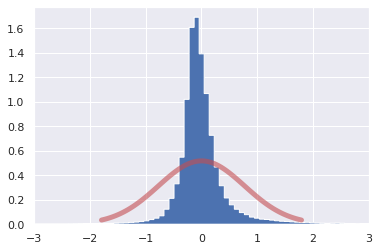

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.gridspec as gridspec

var_name = 'V20'

fig, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)
ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6, label='norm pdf')
ax.hist(df_trainset['V20'].values, density=True, histtype='stepfilled', bins=700);
ax.set_xlim(-3,3)
plt.show()

We can also look at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

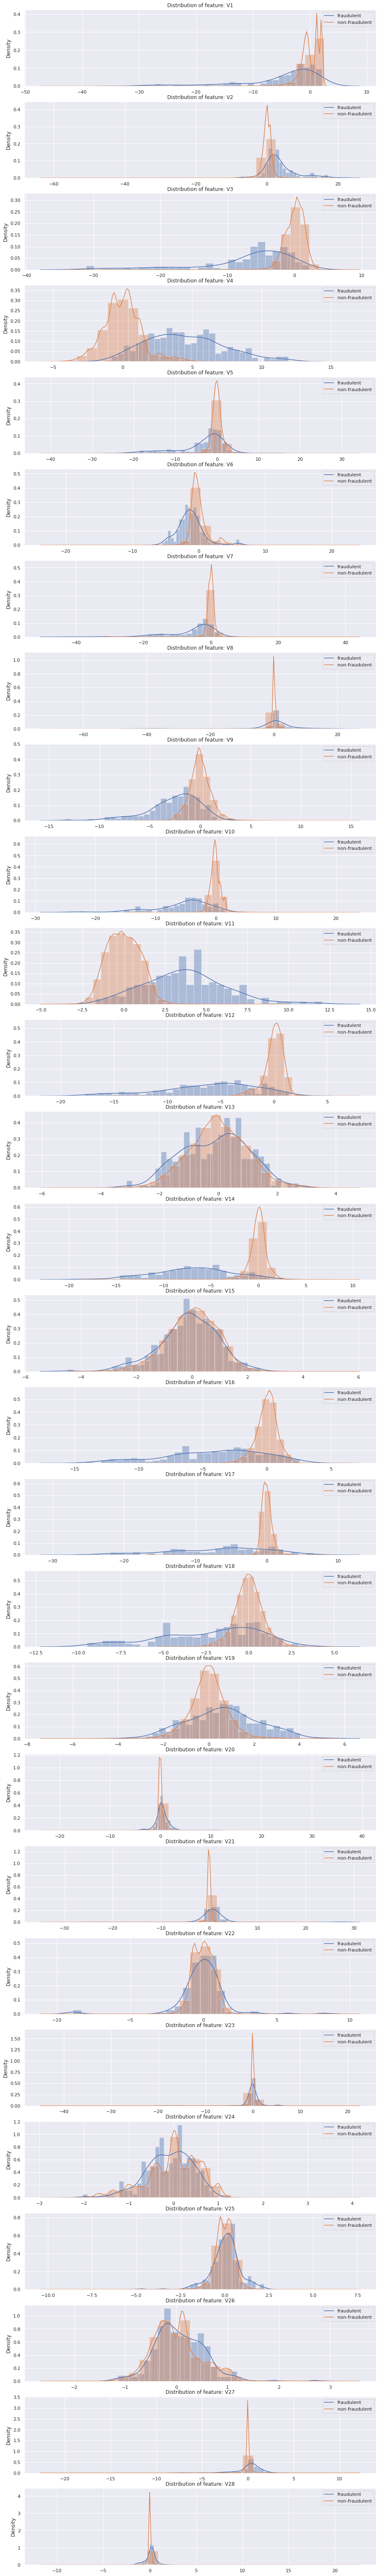

In [15]:
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(X_train[feat][y_train==1], bins=30)
    sns.distplot(X_train[feat][y_train==0], bins=30)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

Explain how these graphs could provide meaningful information about anomaly detection using a gaussian model. **[1]**

From the distribution graphs for each features, we can see that some of features are useful in the model, such as V3, V4, V10, V11, V12, V14, V16. Since the Gaussian distribution for fraudulent and non-fraudulent are separate away from each other, which means it can distinguish between two classes and help us detect anomolies easily. But for some features such as V13, V15, V22, V24, V25, V26, Gaussian distribution for both classes are really closed to each other, which means we cannot learn the differences between two classes and detect outliers by using such features. 

## **Part 2: *Unsupervised,* One Gaussian** -- Single feature model with one Gaussian distribution: [3 Marks]
We'll start by making a prediction using **a single feature of our dataset at a time**. 

  * Fit a Gaussian distribution on a feature of **the full training dataset** (this is unsupervised learning, we don't use the labels) using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes). **[0.5]**
  * Repeat the above steps for each of the features and present your findings in a table. **[0.5]**
  * Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. **[0.5]**
  *  To make a prediction based on a model's scores: If the ``score_samples`` is lower than a threshold, we consider that transaction as a fraud. Find an optimal threshold that maximizes the F1 Score in the training set. It's worth noting that for this last step, we're now using class labels for the first time, and so this method could be considered semi-supervised. **[1]**



In [16]:
# Q1-Q3: fit Gaussian distribution on full traning set and compute AUC for each feature
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
aucs = []
for i in range(28):
    feature = df_trainset.iloc[:, i].values.reshape(-1,1)
    gm.fit(feature)
    p_gm = gm.score_samples(feature)
    fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
    a = auc(fpr_gm, tpr_gm)
    aucs.append(a)

In [17]:
feature_names = list(feature_names)

In [18]:
feature_names.remove('Time')

In [19]:
feature_names.remove('Amount')

In [20]:
# AUC for each feature table
data = {'feature': feature_names, 'AUC': aucs}
table = pd.DataFrame(data=data)
table

,feature,AUC
0,V1,0.705102
1,V2,0.837499
2,V3,0.876537
3,V4,0.892103
4,V5,0.771825
5,V6,0.734380
6,V7,0.862967
7,V8,0.773238
8,V9,0.802874
9,V10,0.913600


In [21]:
# Q4
print('The best feature is', feature_names[np.argmax(aucs)])
print('The corrsponding AUC score is', np.max(aucs))

The best feature is V14
The corrsponding AUC score is 0.9524586211308497


In [22]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [27]:
#Q5
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

V14 = df_trainset.iloc[:, 14].values.reshape(-1,1)
gm.fit(V14)
p_gm = gm.score_samples(V14)

v = []
f1s = []
for i in range(1, len(df_trainset), 1000):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm < mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    num = precision*recall
    den = precision+recall
    f1 = 2*num/den
    f1s.append(f1)
    v.append(mn_gm)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in double_scalars


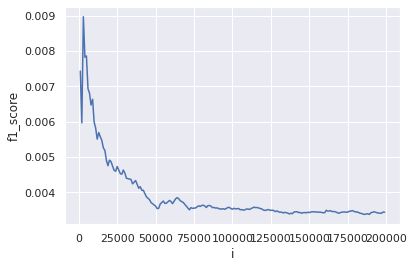

In [28]:
data = {'i': range(1, len(df_trainset), 1000), 'f1_score': f1s}
dist = pd.DataFrame(data=data)
dist
import seaborn as sns
sns.lineplot(data=dist, x='i', y='f1_score')

In [29]:
# zoom in i from 200 to 400, find optimal threshold and maximum f1
V14 = df_trainset.iloc[:, 13].values.reshape(-1,1)
gm.fit(V14)
p_gm = gm.score_samples(V14)

v = []
f1s = []
for i in range(200, 400):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm < mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    num = precision*recall
    den = precision+recall
    f1 = 2*num/den
    f1s.append(f1)
    v.append(mn_gm)

In [30]:
index = np.argmax(f1s) + 200
print('The optimal threshold which maximize F1 score is:', sorted(p_gm)[index])
print('The maximum f1 we can get is', np.max(f1s))

The optimal threshold which maximize F1 score is: -20.56591338149068
The maximum f1 we can get is 0.6146788990825689


## **Part 3: *Supervised,* One Gaussian** -- Single feature model with one Gaussian distribution: [3 Marks]
This part is similar to Part 2, but here we only fit a Gaussian distribution to the non-fraudulent transactions (and not all training data).

  * Fit a Gaussian distribution on a feature of **non-fraudulent transactions** using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute AUC (Area under the ROC Curve) based on ``sklearn.mixture.GaussianMixture.score_samples`` on the full training set (including both classes). **[0.5]**
  * Repeat the above steps for each of the features and present your findings in a table. **[0.5]**
  * Find the best feature to distinguish fraudulent transactions from non-fraudulent transactions based on AUC. **[0.5]**
  *  Find an optimal threshold that maximizes the F1 Score in the training set. **[0.5]**
  *  Compare your results with Part 2 - does using a model based on the full dataset vs a model based only on non-fraudulent data make a big difference on performance? **[0.5]**


In [31]:
df_Xytrain = df_trainset.copy()
df_Xytrain['Class'] = y_train
df_Xytrain

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,0
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,0
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,0
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,-2.000050,-0.625697,-0.932355,1.105463,0.341994,-0.277885,0.227999,-0.130957,1.330776,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,0
86293,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,1.005350,0.899184,1.394628,-0.461663,2.224552,-1.222268,1.405911,-2.125462,-0.905200,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,0
122579,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,0.536337,-0.557701,0.158524,0.125956,-0.242395,-0.116814,0.089840,0.233003,0.631084,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,0
152315,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,1.180940,-3.441205,-0.092307,1.359234,-0.674104,1.826172,0.513497,0.059191,0.495321,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,0


In [32]:
# we create a dataset which only contains non-fauldulent data
df1 = df_Xytrain[df_Xytrain.iloc[:, -1] == 0]
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,0
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,0
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,0
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,-2.000050,-0.625697,-0.932355,1.105463,0.341994,-0.277885,0.227999,-0.130957,1.330776,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,0
86293,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,1.005350,0.899184,1.394628,-0.461663,2.224552,-1.222268,1.405911,-2.125462,-0.905200,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,0
122579,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,0.536337,-0.557701,0.158524,0.125956,-0.242395,-0.116814,0.089840,0.233003,0.631084,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,0
152315,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,1.180940,-3.441205,-0.092307,1.359234,-0.674104,1.826172,0.513497,0.059191,0.495321,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,0


In [33]:
# Q1-Q4: fit on non-fraudulent data only, and compute AUC based on full training set
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
aucs = []
for i in range(28):
    feature = df1.iloc[:, i].values.reshape(-1,1)
    gm.fit(feature)
    feature2 = df_Xytrain.iloc[:, i].values.reshape(-1,1)
    p_gm = gm.score_samples(feature2)
    fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
    a = auc(fpr_gm, tpr_gm)
    aucs.append(a)

In [34]:
print('The best feature is', feature_names[np.argmax(aucs)])
print('The corrsponding AUC score is', round(np.max(aucs),3))

The best feature is V14
The corrsponding AUC score is 0.953


In [35]:
# AUC table
data = {'feature': feature_names, 'AUC': aucs}
table = pd.DataFrame(data=data)
table.sort_values(by = 'AUC', ascending=False)

,feature,AUC
13,V14,0.952599
16,V17,0.934440
11,V12,0.920788
9,V10,0.913558
15,V16,0.902069
10,V11,0.897612
3,V4,0.892612
2,V3,0.877392
6,V7,0.863167
1,V2,0.838015


In [36]:
# Q5: find optimal threshold and maximum f1
V14 = df1.iloc[:, 13].values.reshape(-1,1)
gm.fit(V14)
VV14 = df_Xytrain.iloc[:, 13].values.reshape(-1,1)
p_gm = gm.score_samples(VV14)

v = []
f1s = []
for i in range(200, 400):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm < mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    num = precision*recall
    den = precision+recall
    f1 = 2*num/den
    f1s.append(f1)
    v.append(mn_gm)

In [37]:
index = np.argmax(f1s) + 200
print('The optimal threshold which maximize F1 score is:', sorted(p_gm)[index])
print('The maximum f1 we can get is', np.max(f1s))

The optimal threshold which maximize F1 score is: -22.687216695114675
The maximum f1 we can get is 0.6151515151515151


Q6
There is no big difference between two model. The unsupervised model gives us a maximum f1 score equal to 0.6146788990825689, and the supervised model when we fit non-fraudulent data only gives us a maximum f1 score equal to 0.6151515151515151, just a little bit higher than the first one. The reason for this is that this dataset is highly imbalanced, the percentage of non-fraudulent datapoint(99.83%) is far more than fraudulent datapoint(0.17%), so when we choose which part to fit our model, there is no big difference between non-fraudulent data only and the entire training set. 

In [38]:
# fraudulent datapoint in training set
print('percentage of fraudulent datapoint', (np.sum(df_Xytrain['Class'] == 1)/df_Xytrain.shape[0])*100, '%')
# non-fraudulent datapoint in training set
print('percentage of non-fraudulent datapoint', (np.sum(df_Xytrain['Class'] == 0)/df_Xytrain.shape[0])*100, '%')

percentage of fraudulent datapoint 0.17305029995385326 %
percentage of non-fraudulent datapoint 99.82694970004614 %


## **Part 4: *Supervised,* Two Gaussians** -- Single feature model with two Gaussian distributions. [3 Marks]
Now we will use two separate distributions for fraudulent and non-fraudulent transactions.
  *  Fit a Gaussian distribution ($G_1$) on a feature of non-fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. Use the feature that lead to the best AUC in Part 3. **[0.5]**
  * Fit another Gaussian distribution ($G_2$) on the same feature but for fraudulent transactions using ``sklearn.mixture.GaussianMixture`` when ``n_components=1``. **[0.5]**
  * Compute the score samples ($S$) for both $G_1$ and $G_2$ on the whole training set to get $S_1$ and $S_2$, respectively. **[0.5]**
  * Find an optimal $c$ (a real number) that maximizes F1 Score for a model such that if $S_1 < c \times S_2$, the transaction is classified as a fraud. For example, if $c=1$ we could say that if $S_2$ is greater than $S_1$ then the transaction is a fraud (the transaction belongs to the $G_2$ distribution which represents fraudulent transactions). **[0.5]**
  * Repeat the steps above for at least two other features. **[1]**

In [39]:
df1 #non-fraudulent data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,0
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,0
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,0
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,-2.000050,-0.625697,-0.932355,1.105463,0.341994,-0.277885,0.227999,-0.130957,1.330776,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,0
86293,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,1.005350,0.899184,1.394628,-0.461663,2.224552,-1.222268,1.405911,-2.125462,-0.905200,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,0
122579,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,0.536337,-0.557701,0.158524,0.125956,-0.242395,-0.116814,0.089840,0.233003,0.631084,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,0
152315,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,1.180940,-3.441205,-0.092307,1.359234,-0.674104,1.826172,0.513497,0.059191,0.495321,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,0


In [40]:
df2 = df_Xytrain[df_Xytrain.iloc[:, -1] == 1]
df2 #fraudulent data

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
41569,-2.377533,0.520539,-8.094139,8.005351,2.640750,-3.381586,-1.934372,0.562322,-3.104027,-3.051210,5.735763,-4.747693,-0.784223,-10.716339,0.656517,-1.142467,0.918591,1.126335,0.092973,-0.634747,0.148284,0.721100,2.661291,-0.508620,-0.401657,0.587611,0.500326,0.551760,1
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,1
222419,0.457845,1.373769,-0.488926,2.805351,1.777386,0.100492,1.295016,-0.135857,-1.695822,0.955004,-1.702228,-0.240056,0.456475,0.139567,-1.890974,0.372379,-0.798201,-0.697062,-1.497152,-0.264705,0.105593,0.371014,0.051105,0.401524,-0.724766,-0.202881,0.092124,0.094956,1
234633,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,1.991361,-3.986416,0.577207,-8.485795,-0.794782,-0.666134,-1.372629,-0.104313,-1.466911,0.313332,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486,1
79835,0.340391,2.015233,-2.777330,3.812024,-0.461729,-1.152022,-2.001959,0.548681,-2.344042,-3.076699,3.554738,-3.969689,-0.932184,-5.876067,-0.066739,-1.495281,-4.424757,-0.619323,-0.231198,0.326773,0.299769,-0.583283,-0.187696,-0.329256,0.732328,0.058080,0.553143,0.318832,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,-7.191604,7.102989,-9.928700,-0.067498,-10.924187,-1.697914,-2.379421,-2.775114,0.273799,-1.382188,0.399097,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937,1
145800,-0.419820,-1.155978,-2.092516,2.786750,0.736297,-0.167292,1.600027,-0.117427,-0.796954,-0.133950,1.033032,-0.284368,-1.208280,-0.429212,0.248945,-0.928922,1.679986,1.315339,2.226161,1.275358,0.480640,0.533517,1.284645,0.516131,-0.602941,-0.305024,-0.021363,0.129096,1
73784,-5.753852,0.577610,-6.312782,5.159401,-1.698320,-2.683286,-7.934389,2.373550,-3.073079,-7.145137,6.250068,-9.150823,-1.376141,-9.982585,1.202217,-7.565042,-13.691474,-4.366867,2.181423,0.017500,1.177852,0.175331,-1.211123,-0.446891,-0.405520,-0.165797,1.505516,0.359492,1
42756,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,-12.888158,6.854953,-13.211695,1.035612,-13.778956,1.040448,-11.290328,-20.578022,-7.547824,3.118480,-0.046170,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,1


In [41]:
# Q1 - Q3, fit G1 and G2, compute score samples S1 and S2
#V14 is the feature that lead to best AUC in part3
V14 = df1.iloc[:, 13].values.reshape(-1,1)
gm1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm1.fit(V14)
VV14 = df_Xytrain.iloc[:, 13].values.reshape(-1,1)
s1 = gm1.score_samples(VV14)

In [42]:
df2 = df_Xytrain[df_Xytrain.iloc[:, -1] == 1]
V14 = df2.iloc[:, 13].values.reshape(-1,1)
gm2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm2.fit(V14)
VV14 = df_Xytrain.iloc[:, 13].values.reshape(-1,1)
s2 = gm2.score_samples(VV14)

In [43]:
# Q4: find optimal c
f1s = []
for c in np.arange(0, 10, 0.1):
    f1 = f1_score(y_train, s1<c*s2)
    f1s.append(f1)
print('The optimal c for V14 is', np.argmax(f1s)*0.1, 'The maximum f1 score is', np.max(f1s))

The optimal c for V14 is 9.700000000000001 The maximum f1 score is 0.6353677621283255


In [44]:
# Q5: we choose V1, V10, V12

In [45]:
# V1
V1 = df1.iloc[:, 0].values.reshape(-1,1)
gm1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm1.fit(V1)
VV1 = df_Xytrain.iloc[:, 0].values.reshape(-1,1)
s1 = gm1.score_samples(VV1)

In [46]:
V1 = df2.iloc[:, 0].values.reshape(-1,1)
gm2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm2.fit(V1)
VV1 = df_Xytrain.iloc[:, 0].values.reshape(-1,1)
s2 = gm2.score_samples(VV1)

In [47]:
f1s = []
for c in np.arange(0, 10, 0.1):
    f1 = f1_score(y_train, s1<c*s2)
    f1s.append(f1)
print('The optimal c for V1 is', np.argmax(f1s)*0.1,  'The maximum f1 score is', np.max(f1s))

The optimal c for V1 is 6.7 The maximum f1 score is 0.1544943820224719


In [48]:
# V10
V10 = df1.iloc[:, 9].values.reshape(-1,1)
gm1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm1.fit(V10)
VV10 = df_Xytrain.iloc[:, 9].values.reshape(-1,1)
s1 = gm1.score_samples(VV10)

In [49]:
V10 = df2.iloc[:, 9].values.reshape(-1,1)
gm2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm2.fit(V10)
VV10 = df_Xytrain.iloc[:, 9].values.reshape(-1,1)
s2 = gm2.score_samples(VV10)

In [50]:
f1s = []
for c in np.arange(0, 10, 0.1):
    f1 = f1_score(y_train, s1<c*s2)
    f1s.append(f1)
print('The optimal c for V10 is', np.argmax(f1s)*0.1, 'The maximum f1 score is', np.max(f1s))

The optimal c for V10 is 8.1 The maximum f1 score is 0.4274193548387097


In [51]:
# V12
V12 = df1.iloc[:, 11].values.reshape(-1,1)
gm1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm1.fit(V12)
VV12 = df_Xytrain.iloc[:, 11].values.reshape(-1,1)
s1 = gm1.score_samples(VV12)

In [52]:
V12 = df2.iloc[:, 11].values.reshape(-1,1)
gm2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm2.fit(V12)
VV12 = df_Xytrain.iloc[:, 11].values.reshape(-1,1)
s2 = gm2.score_samples(VV12)


In [53]:
f1s = []
for c in np.arange(0, 10, 0.1):
    f1 = f1_score(y_train, s1<c*s2)
    f1s.append(f1)
print('The optimal c for V12 is', np.argmax(f1s)*0.1, 'The maximum f1 score is', np.max(f1s))

The optimal c for V12 is 5.0 The maximum f1 score is 0.6866666666666666


## **Part 5: Multivariate and Mixture of Gaussians Distribution** [6 Marks]
We now want to build an outlier detection model that performs well in terms of F1 score. To design your model, you can benefit from:

*   No restrictions on the number of features - use as few or as many as you want! (multivariate). 
*   To fit your model, you can take advantage of the Gaussian mixture model where you can set the number of components [help](https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html) (take a look at the hint below).
*   You can choose to fit your Gaussians on non-fraudulent transactions or to both classes. **Make sure you have at least one model of each group**.
* You can use supervised and/or unsupervised methods. **Make sure you have at least one model of each group**.

It is up to you how to design your model. Try at least 12 different models and report the AUC and best F1 score for each one. What kind of model works better? How many features are best (and which ones)? How many Gaussians? How many components? Summarize your findings with tables and plots. **[6]**

**HINT!**

Does it make sense to have more than two Gaussians (or a mixture with more than 2 components) in this kind of (binary) task?

 The answer is YES, and it depends on the distribution of data. Remember the tutorial, where we had 5 clusters and fit a mixture of 5 Gaussians to detect outliers. Consider the transaction is valid if it is close to each one of those five clusters, and it is not valid if it is not close to them! For example (figure below), assume we have a high volume of legitimate transactions in the morning until lunchtime (9 AM to 12 PM). We have fewer transactions during lunchtime. Then we have another pick between (1 PM to 4 PM). In this example, it is reasonable to have two valid clusters (compenents), one for the morning and another for the afternoon transactions.
 ![Example:](https://raw.githubusercontent.com/aps1070-2019/datasets/master/img/AMoW2.png)


### Explanations for part5

##### There are 14 models in total, which can be categorized by 3 parts. 

##### The first part (model 1, 2 and 3) is **unsupervised model**, I used all features but changed **number of components** with 1, 2 and 3 respectively.  

##### The second part (model 4, 5, 6, 7 and 8) is **supervised model**, I fit non-fraudulent data only, using all features but changed **number of components** with 1, 2, 3, 5 and 10 respectively.

##### The third part (model 9, 10, 11, 12, 13 and 14) is **supervised model** with two Gaussians. More specifically, for model 9, 10 and 11: I used **all features**, changed **number of components** with 1, 2 and 3 respectively. For model 12, 13 and 14: I used **only 4 features** with highest AUC score, and still changed **number of components** with 1, 2 and 3 respectively.

##### I compared models within each part, generated a graph to show how f1 score changed with different number of components, and I added explanations for each part below the graph. 

##### In the end of part5, I created a table to summarized all f1 scores and AUC for 14 models. 

# Part 1

In [54]:
# AUC table
aucs = []
for i in range(28):
    feature = df_trainset.iloc[:, i].values.reshape(-1,1)
    gm.fit(feature)
    p_gm = gm.score_samples(feature)
    fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
    a = auc(fpr_gm, tpr_gm)
    aucs.append(a)

data = {'feature': feature_names, 'AUC': aucs}
table = pd.DataFrame(data=data)
table.sort_values(by=['AUC'], ascending = False)

,feature,AUC
13,V14,0.952459
16,V17,0.934852
11,V12,0.920180
9,V10,0.913600
15,V16,0.902137
10,V11,0.897175
3,V4,0.892103
2,V3,0.876537
6,V7,0.862967
1,V2,0.837499


### model 1: unsupervised model, Single Gaussian, using all features, n_component = 1

In [55]:
enfea = df_trainset.values
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm.fit(enfea)
p_gm = gm.score_samples(enfea)
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
a_m1 = auc(fpr_gm, tpr_gm)

f1sm1 = []
for i in range(200, 400):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm < mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    num = precision*recall
    den = precision+recall
    f1 = 2*num/den
    f1sm1.append(f1)

print('The maximum f1 is', np.max(f1sm1))
model1 = np.max(f1sm1)
print('AUC is', a_m1)

The maximum f1 is 0.294010889292196
AUC is 0.9534767309013028


### model 2: unsupervised model, Single Gaussian, using all features, n_component = 2

In [56]:
enfea = df_trainset.values
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(enfea)
p_gm = gm.score_samples(enfea)
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
a_m2 = auc(fpr_gm, tpr_gm)

f1sm2 = []
for i in range(200, 400):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm < mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    num = precision*recall
    den = precision+recall
    f1 = 2*num/den
    f1sm2.append(f1)

print('The maximum f1 is', np.max(f1sm2))
model2 = np.max(f1sm2)
print('AUC is', a_m2)


The maximum f1 is 0.28222996515679444
AUC is 0.9311393836041144


### model 3: unsupervised model, Single Gaussian, using all features, n_component = 3

In [57]:
enfea = df_trainset.values
gm = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
gm.fit(enfea)
p_gm = gm.score_samples(enfea)
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
a_m3 = auc(fpr_gm, tpr_gm)

f1sm3 = []
for i in range(200, 400):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm < mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    num = precision*recall
    den = precision+recall
    f1 = 2*num/den
    f1sm3.append(f1)

print('The maximum f1 is', np.max(f1sm3))
model3 = np.max(f1sm3)
print('AUC is', a_m3)

The maximum f1 is 0.2759795570698467
AUC is 0.9319815433833387


### summary for model 1, 2 and 3

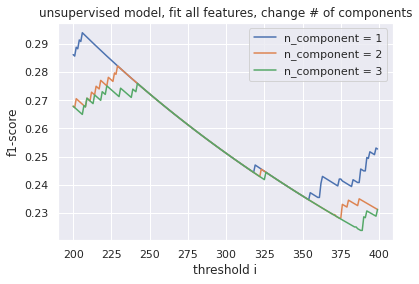

In [58]:
import matplotlib.pyplot as plt
plt.plot(range(200, 400), f1sm1, label='n_component = 1')
plt.plot(range(200, 400), f1sm2, label='n_component = 2')
plt.plot(range(200, 400), f1sm3, label='n_component = 3')
plt.title('unsupervised model, fit all features, change # of components')
plt.xlabel('threshold i')
plt.ylabel('f1-score')
plt.legend()
plt.show()

For unsupervised model, the f1 scores are not ideal, they are all below than 30%. As the number of components n increases, f1 score keeps decreasing. The reason for this is that as n_components goes higher, the model will fit data points more and more complex, in other words, the distribution will fit the data closer and closer (noise and all). And also, the model isn't being optimized based on labels - it doesn't know which class it belongs to. Therefore, f1 scores decreases as the number of components increases. 

# Supervised model

In [59]:
# AUC table by fit on non-fradulent only
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
aucs = []
for i in range(28):
    feature = df1.iloc[:, i].values.reshape(-1,1)
    gm.fit(feature)
    feature2 = df_Xytrain.iloc[:, i].values.reshape(-1,1)
    p_gm = gm.score_samples(feature2)
    fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
    a = auc(fpr_gm, tpr_gm)
    aucs.append(a)
data = {'feature': feature_names, 'AUC(non-fraudulent only)': aucs}
table = pd.DataFrame(data=data)
table.sort_values(by=['AUC(non-fraudulent only)'], ascending = False)

,feature,AUC(non-fraudulent only)
13,V14,0.952599
16,V17,0.934440
11,V12,0.920788
9,V10,0.913558
15,V16,0.902069
10,V11,0.897612
3,V4,0.892612
2,V3,0.877392
6,V7,0.863167
1,V2,0.838015


# Part 2

### model 4: supervised model, Single Gaussian, fit non-fraudulent only, by using all features, n_component = 1

In [60]:
# non-fraudulent data without labels
df1_nolab = df1.drop('Class', axis = 1)
df1_nolab

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,-0.446486,-2.000050,-0.625697,-0.932355,1.105463,0.341994,-0.277885,0.227999,-0.130957,1.330776,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589
86293,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,-0.853181,1.005350,0.899184,1.394628,-0.461663,2.224552,-1.222268,1.405911,-2.125462,-0.905200,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400
122579,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,1.611424,0.536337,-0.557701,0.158524,0.125956,-0.242395,-0.116814,0.089840,0.233003,0.631084,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665
152315,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,0.470972,1.180940,-3.441205,-0.092307,1.359234,-0.674104,1.826172,0.513497,0.059191,0.495321,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471


In [61]:
nonfraud = df1_nolab.values
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm.fit(nonfraud)
nonfraud1 = df_trainset.values
p_gm = gm.score_samples(nonfraud1)
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
a_m4 = auc(fpr_gm, tpr_gm)

f1sm4 = []
for i in range(200, 400):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm < mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    num = precision*recall
    den = precision+recall
    f1 = 2*num/den
    f1sm4.append(f1)

print('The maximum f1 is', np.max(f1sm4))
model4 = np.max(f1sm4)
print('AUC is', a_m4)

The maximum f1 is 0.533724340175953
AUC is 0.9583206934360867


### model 5: supervised model, Single Gaussian, fit non-fraudulent only, by using all features, n_component = 2

In [62]:
nonfraud = df1_nolab.values
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(nonfraud)
nonfraud1 = df_trainset.values
p_gm = gm.score_samples(nonfraud1)
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
a_m5 = auc(fpr_gm, tpr_gm)

f1sm5 = []
for i in range(200, 400):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm < mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    num = precision*recall
    den = precision+recall
    f1 = 2*num/den
    f1sm5.append(f1)

print('The maximum f1 is', np.max(f1sm5))
model5 = np.max(f1sm5)
print('AUC is', a_m5)

The maximum f1 is 0.5247376311844077
AUC is 0.940855679717711


### model 6: supervised model, Single Gaussian, fit non-fraudulent only, by using all features, n_component = 3

In [63]:
nonfraud = df1_nolab.values
gm = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
gm.fit(nonfraud)
nonfraud1 = df_trainset.values
p_gm = gm.score_samples(nonfraud1)
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
a_m6 = auc(fpr_gm, tpr_gm)

f1sm6 = []
for i in range(200, 400):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm < mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    num = precision*recall
    den = precision+recall
    f1 = 2*num/den
    f1sm6.append(f1)

print('The maximum f1 is', np.max(f1sm6))
model6 = np.max(f1sm6)
print('AUC is', a_m6)

The maximum f1 is 0.5304964539007092
AUC is 0.9356693421813707


### model 7: supervised model, Single Gaussian, fit non-fraudulent only, by using all features, n_component = 5

In [64]:
nonfraud = df1_nolab.values
gm = GaussianMixture(n_components = 5, covariance_type = 'full', random_state=0)
gm.fit(nonfraud)
nonfraud1 = df_trainset.values
p_gm = gm.score_samples(nonfraud1)
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
a_m7 = auc(fpr_gm, tpr_gm)

f1sm7 = []
for i in range(200, 400):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm < mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    num = precision*recall
    den = precision+recall
    f1 = 2*num/den
    f1sm7.append(f1)

print('The maximum f1 is', np.max(f1sm7))
model7 = np.max(f1sm7)
print('AUC is', a_m7)

The maximum f1 is 0.5352564102564102
AUC is 0.9359360707749773


### model 8: supervised model, Single Gaussian, fit non-fraudulent only, by using all features, n_component = 10

In [65]:
nonfraud = df1_nolab.values
gm = GaussianMixture(n_components = 10, covariance_type = 'full', random_state=0)
gm.fit(nonfraud)
nonfraud1 = df_trainset.values
p_gm = gm.score_samples(nonfraud1)
fpr_gm, tpr_gm, _ = roc_curve(y_train, 1-p_gm)
a_m8 = auc(fpr_gm, tpr_gm)

f1sm8 = []
for i in range(200, 400):
    mn_gm = sorted(p_gm)[i]
    precision = precision_score(y_train, p_gm < mn_gm)
    recall = recall_score(y_train, p_gm < mn_gm)
    num = precision*recall
    den = precision+recall
    f1 = 2*num/den
    f1sm8.append(f1)

print('The maximum f1 is', np.max(f1sm8))
model8 = np.max(f1sm8)
print('AUC is', a_m8)

The maximum f1 is 0.653846153846154
AUC is 0.9348137833464447


### summary for model 4, 5, 6, 7 and 8

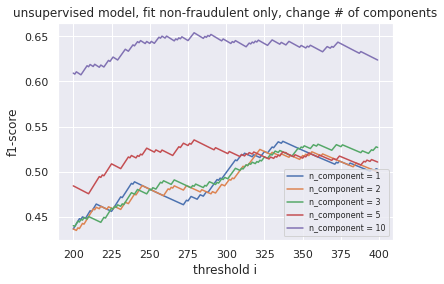

In [66]:
import matplotlib.pyplot as plt
plt.plot(range(200, 400), f1sm4, label='n_component = 1')
plt.plot(range(200, 400), f1sm5, label='n_component = 2')
plt.plot(range(200, 400), f1sm6, label='n_component = 3')
plt.plot(range(200, 400), f1sm7, label='n_component = 5')
plt.plot(range(200, 400), f1sm8, label='n_component = 10')
plt.title('unsupervised model, fit non-fraudulent only, change # of components')
plt.xlabel('threshold i')
plt.ylabel('f1-score')
plt.legend(fontsize=8, loc ="lower right")
plt.show()

For model 4 to model 8, I used supervised model, fit a single Gaussian, by using all features but tried different n_components with 1, 2, 3, 5 and 10. Overall f1 score is increasing as the number of components increases compared to unsupervised model. The reason for this is that the percentage of non-fraudulent class is more than 99%, the model has already seen the majority of data when predicting on the entire training dataset. Moreover, in supervised model, labels for all datapoints are known, providing an answer key that the algorithm can use to evaluate its accuracy on training data. When we increase the number of components, the model fit data closer and closer. The overall model performance is being optimized based on labels since it knows which class the datapoint belongs to. But in unsupervised model, with unlabeled data, the model try to extract patterns on its own. When we increase the number of components, the model will fit noise more closer and closer as well. Therefore, f1 score increases as the number of compnent increases in supervised model.  

# Part 3

### model 9: supervised model, two Gaussians, by using all features, n_component = 1

In [67]:
# fraudulent data only, with no labels
df2_nolab = df2.drop('Class', axis = 1)
df2_nolab

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
41569,-2.377533,0.520539,-8.094139,8.005351,2.640750,-3.381586,-1.934372,0.562322,-3.104027,-3.051210,5.735763,-4.747693,-0.784223,-10.716339,0.656517,-1.142467,0.918591,1.126335,0.092973,-0.634747,0.148284,0.721100,2.661291,-0.508620,-0.401657,0.587611,0.500326,0.551760
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,2.858466,-3.096915,-0.792532,-5.210141,-0.613803,-2.155297,-3.267116,-0.688505,0.737657,0.226138,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637
222419,0.457845,1.373769,-0.488926,2.805351,1.777386,0.100492,1.295016,-0.135857,-1.695822,0.955004,-1.702228,-0.240056,0.456475,0.139567,-1.890974,0.372379,-0.798201,-0.697062,-1.497152,-0.264705,0.105593,0.371014,0.051105,0.401524,-0.724766,-0.202881,0.092124,0.094956
234633,1.261324,2.726800,-5.435019,5.342759,1.447043,-1.442584,-0.898702,0.123062,-2.748496,-3.202436,1.991361,-3.986416,0.577207,-8.485795,-0.794782,-0.666134,-1.372629,-0.104313,-1.466911,0.313332,0.209086,-0.425938,-0.154440,-0.018820,0.632234,0.192922,0.468181,0.280486
79835,0.340391,2.015233,-2.777330,3.812024,-0.461729,-1.152022,-2.001959,0.548681,-2.344042,-3.076699,3.554738,-3.969689,-0.932184,-5.876067,-0.066739,-1.495281,-4.424757,-0.619323,-0.231198,0.326773,0.299769,-0.583283,-0.187696,-0.329256,0.732328,0.058080,0.553143,0.318832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6899,-2.661802,5.856393,-7.653616,6.379742,-0.060712,-3.131550,-3.103570,1.778492,-3.831154,-7.191604,7.102989,-9.928700,-0.067498,-10.924187,-1.697914,-2.379421,-2.775114,0.273799,-1.382188,0.399097,0.734775,-0.435901,-0.384766,-0.286016,1.007934,0.413196,0.280284,0.303937
145800,-0.419820,-1.155978,-2.092516,2.786750,0.736297,-0.167292,1.600027,-0.117427,-0.796954,-0.133950,1.033032,-0.284368,-1.208280,-0.429212,0.248945,-0.928922,1.679986,1.315339,2.226161,1.275358,0.480640,0.533517,1.284645,0.516131,-0.602941,-0.305024,-0.021363,0.129096
73784,-5.753852,0.577610,-6.312782,5.159401,-1.698320,-2.683286,-7.934389,2.373550,-3.073079,-7.145137,6.250068,-9.150823,-1.376141,-9.982585,1.202217,-7.565042,-13.691474,-4.366867,2.181423,0.017500,1.177852,0.175331,-1.211123,-0.446891,-0.405520,-0.165797,1.505516,0.359492
42756,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,-12.888158,6.854953,-13.211695,1.035612,-13.778956,1.040448,-11.290328,-20.578022,-7.547824,3.118480,-0.046170,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908


In [68]:
nonfraud = df1_nolab.values
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm.fit(nonfraud)
nonfraud1 = df_trainset.values
s1 = gm.score_samples(nonfraud1)

In [69]:
fraud = df2_nolab.values
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm.fit((fraud))
fraud1 = df_trainset.values
s2 = gm.score_samples(fraud1)

In [70]:
from sklearn.metrics import f1_score
f1sm9 = []
for c in np.arange(0, 10, 0.1):
    f1 = f1_score(y_train, s1<c*s2)
    f1sm9.append(f1)
print('The optimal c is', np.argmax(f1sm9)*0.1, 'The maximum f1 score is', np.max(f1sm9))
model9 = np.max(f1sm9)

The optimal c is 7.0 The maximum f1 score is 0.7375886524822696


### model 10: supervised model, two Gaussians, by using all features, n_component = 2

In [71]:
nonfraud = df1_nolab.values
gm = GaussianMixture(n_components = 2 , covariance_type = 'full', random_state=0)
gm.fit(nonfraud)
nonfraud1 = df_trainset.values
s1 = gm.score_samples(nonfraud1)

In [72]:
fraud = df2_nolab.values
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit((fraud))
fraud1 = df_trainset.values
s2 = gm.score_samples(fraud1)

In [73]:
f1sm10 = []
for c in np.arange(0, 10, 0.1):
    f1 = f1_score(y_train, s1<c*s2)
    f1sm10.append(f1)
print('The optimal c is', np.argmax(f1sm10)*0.1, 'The maximum f1 score is', np.max(f1sm10))
model10 = np.max(f1sm10)

The optimal c is 3.2 The maximum f1 score is 0.7897897897897898


### model 11: supervised model, two Gaussians, by using all features, n_component = 3

In [74]:
nonfraud = df1_nolab.values
gm = GaussianMixture(n_components = 3 , covariance_type = 'full', random_state=0)
gm.fit(nonfraud)
nonfraud1 = df_trainset.values
s1 = gm.score_samples(nonfraud1)

In [75]:
fraud = df2_nolab.values
gm = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
gm.fit(fraud)
fraud1 = df_trainset.values
s2 = gm.score_samples(fraud1)

In [76]:
f1sm11 = []
for c in np.arange(0, 10, 0.1):
    f1 = f1_score(y_train, s1<c*s2)
    f1sm11.append(f1)
print('The optimal c is', np.argmax(f1sm11)*0.1, 'The maximum f1 score is', np.max(f1sm11))
model11 = np.max(f1sm11)

The optimal c is 1.8 The maximum f1 score is 0.7868852459016393


### Summary for model 9, 10 and 11

When we use two Guassians, the f1 score achieves highest when n_comp = 2. Since we only have two classes: non-fraudulent and fraudulent. 

### model 12: supervised model, two Gaussians, by using features 'V14', 'V17', 'V12', 'V10', n_component = 1

In [77]:
top4nf = df1_nolab.iloc[:, [9, 11, 13, 16]].values
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm.fit(top4nf)
nonfraud1 = df_trainset.iloc[:, [9, 11, 13, 16]].values
s1 = gm.score_samples(nonfraud1)

In [78]:
top4f = df2_nolab.iloc[:, [9, 11, 13, 16]].values
gm = GaussianMixture(n_components = 1, covariance_type = 'full', random_state=0)
gm.fit(top4f)
fraud1 = df_trainset.iloc[:, [9, 11, 13, 16]].values
s2 = gm.score_samples(fraud1)

In [79]:
f1sm12 = []
for c in np.arange(0, 10, 0.1):
    f1 = f1_score(y_train, s1<c*s2)
    f1sm12.append(f1)
print('The optimal c is', np.argmax(f1sm12)*0.1, 'The maximum f1 score is', np.max(f1sm12))
model12 = np.max(f1sm12)

The optimal c is 6.4 The maximum f1 score is 0.8121212121212121


### model 13: supervised model, two Gaussians, by using features 'V14', 'V17', 'V12', 'V10', n_component = 2

In [80]:
top4nf = df1_nolab.iloc[:, [9, 11, 13, 16]].values
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(top4nf)
nonfraud1 = df_trainset.iloc[:, [9, 11, 13, 16]].values
s1 = gm.score_samples(nonfraud1)

In [81]:
top4f = df2_nolab.iloc[:, [9, 11, 13, 16]].values
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(top4f)
fraud1 = df_trainset.iloc[:, [9, 11, 13, 16]].values
s2 = gm.score_samples(fraud1)

In [82]:
f1sm13 = []
for c in np.arange(0, 10, 0.1):
    f1 = f1_score(y_train, s1<c*s2)
    f1sm13.append(f1)
print('The optimal c is', np.argmax(f1sm13)*0.1, 'The maximum f1 score is', np.max(f1sm13))
model13 = np.max(f1sm13)

The optimal c is 2.9000000000000004 The maximum f1 score is 0.8185907046476761


### model 14: supervised model, two Gaussians, by using features 'V14', 'V17', 'V12', 'V10', n_component = 3

In [83]:
top4nf = df1_nolab.iloc[:, [9, 11, 13, 16]].values
gm = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
gm.fit(top4nf)
nonfraud1 = df_trainset.iloc[:, [9, 11, 13, 16]].values
s1 = gm.score_samples(nonfraud1)

In [84]:
top4f = df2_nolab.iloc[:, [9, 11, 13, 16]].values
gm = GaussianMixture(n_components = 3, covariance_type = 'full', random_state=0)
gm.fit(top4f)
fraud1 = df_trainset.iloc[:, [9, 11, 13, 16]].values
s2 = gm.score_samples(fraud1)

In [85]:
f1sm14 = []
for c in np.arange(0, 10, 0.1):
    f1 = f1_score(y_train, s1<c*s2)
    f1sm14.append(f1)
print('The optimal c is', np.argmax(f1sm14)*0.1, 'The maximum f1 score is', np.max(f1sm14))
model14 = np.max(f1sm14)

The optimal c is 2.4000000000000004 The maximum f1 score is 0.8024502297090352


### summary for model 9, 10, 11, 12, 13 and 14

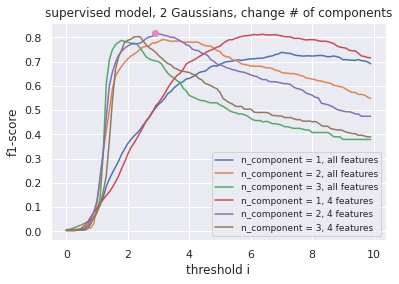

In [86]:
plt.plot(np.arange(0, 10, 0.1), f1sm9, label='n_component = 1, all features')
plt.plot(np.arange(0, 10, 0.1), f1sm10, label='n_component = 2, all features')
plt.plot(np.arange(0, 10, 0.1), f1sm11, label='n_component = 3, all features')
plt.plot(np.arange(0, 10, 0.1), f1sm12, label='n_component = 1, 4 features')
plt.plot(np.arange(0, 10, 0.1), f1sm13, label='n_component = 2, 4 features')
plt.plot(np.arange(0, 10, 0.1), f1sm14, label='n_component = 3, 4 features')
plt.plot(np.argmax(f1sm13)*0.1, np.max(f1sm13), marker='o') # highlight the maximum f1 score achieved by model 13
plt.title('supervised model, 2 Gaussians, change # of components')
plt.xlabel('threshold i')
plt.ylabel('f1-score')
plt.legend(fontsize = 9, loc ="lower right")
plt.show()

For part 3, I still used supervised model, 2 Gaussians, tried different number of components with 1, 2 and 3. But from model 9 to 11, I used all features, while from model 12 to 14, I only used features 'V14', 'V17', 'V12', 'V10'. The reason why I used V14', 'V17', 'V12', 'V10' is that these four features has highest AUC scores, and the highest f1 score is around 0.819 when n_component = 2 (model 13). 
F1 score is a little bit higher when using 4 features instead of using all features to fit our model, this is because we have a lot of features are not so helpful to distingush between fraudulent and non-fraudulent datapoint, such as 'V24' and 'V26'. But in model 12, 13 and 14, we only used helpful features to train model, without those noise created by unimportant features, f1 score is higher than before.

Moreover, this result also echoes what I just discussed above in summary of model 9, 10 and 11: when we use two Guassians, with four features, the f1 score still achieves highest when n_comp = 2. Since we only have two classes: non-fraudulent and fraudulent.

# table

In [87]:
# For supervised model with 2 Gaussians, we don't have a threshold so we don't have AUC score either.
# Therefore, I used N/A in the following table to represent AUC score for model 9 ~ model 14, and I round AUC to 3 digits for model 1 ~ model 8. 
a_m1 = round(a_m1, 3)
a_m2 = round(a_m2, 3)
a_m3 = round(a_m3, 3)
a_m4 = round(a_m4, 3)
a_m5 = round(a_m5, 3)
a_m6 = round(a_m6, 3)
a_m7 = round(a_m7, 3)
a_m8 = round(a_m8, 3)
a_m9 = 'N/A'
a_m10 = 'N/A'
a_m11 = 'N/A'
a_m12 = 'N/A'
a_m13 = 'N/A'
a_m14 = 'N/A'

In [88]:
# round f1 score for all model to 3 digits
list1 = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11, model12, model13, model14]
list1_new = np.round(list1, 3)

In [89]:
# the following table shows f1 score and AUC for all model, in descending order
a = np.array([[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
              list1_new,
              [a_m1, a_m2, a_m3, a_m4, a_m5, a_m6, a_m7, a_m8, a_m9, a_m10, a_m11, a_m12, a_m13, a_m14]])
summary = pd.DataFrame(data=a, index=['model', 'f1_score', 'AUC'],columns=list(range(14))).T
summary.sort_values(by = ['f1_score'], ascending = False)

,model,f1_score,AUC
12,13,0.819,N/A
11,12,0.812,N/A
13,14,0.802,N/A
9,10,0.79,N/A
10,11,0.787,N/A
8,9,0.738,N/A
7,8,0.654,0.935
6,7,0.535,0.936
3,4,0.534,0.958
5,6,0.53,0.936


### From the above graph and table, we can see that model 13 has a highest f1 score (81.9%). 

## **Part 6: Evaluating performance on test set:** [1 Mark]
**Which model worked better?** Pick your best model among all models and apply it to your test set. Report the F1 Score, precision and recall on the test set. **[1]**


### model 13 worked better

In [90]:
# drop 'time' and 'amount' from testset
X_test1 = X_test.drop(['Time', 'Amount'], axis = 1)
X_test1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,-1.118863,0.202647,1.145965,-1.802360,-0.247178,-0.060945,0.846606,0.379454,0.847262,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,-0.854776,-0.620458,-0.806471,-0.770837,-0.108158,0.258964,0.492095,-0.148516,-0.148099,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,-1.726259,-0.736771,-1.516835,0.348343,0.041437,0.732681,-1.136766,0.816653,-1.578951,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,1.551682,0.435125,-0.336022,0.278965,1.812232,0.080001,0.116347,0.291818,0.106228,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,0.664531,-3.282511,0.409266,1.252202,-0.868774,0.214387,1.878003,-1.906559,0.263854,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208059,-0.429070,0.712074,0.675855,-0.403577,0.668849,-0.413713,0.665961,0.099935,-0.379066,-1.117560,0.681042,-0.002466,-0.632451,-1.002618,-0.471467,0.818201,0.162647,0.953770,0.071006,0.016809,-0.102000,-0.391487,-0.332563,-0.512572,0.746656,0.368231,-0.150931,-0.111220
260930,-4.673996,-3.716208,-1.486611,0.829036,0.902701,-0.501887,2.994824,-1.188013,0.864683,-0.798728,-0.271460,-0.214527,0.717591,-2.549453,0.323361,0.346689,0.696571,0.200273,1.132735,-2.927002,-1.387099,0.414913,3.103269,0.642007,0.464011,0.027749,0.973848,-1.566714
75125,-1.215390,1.379556,0.438732,1.394346,-0.377212,0.843496,-0.975098,-1.969737,-0.917814,-0.602581,0.984745,1.630668,0.249543,0.776797,-0.639176,-0.674297,0.621338,-0.210390,0.747242,0.659545,-1.230618,0.716991,0.107986,0.042642,-0.046630,-0.251591,0.234356,-0.035339
37292,-0.632439,1.212284,1.388188,0.151509,-0.342824,-1.337771,0.648076,-0.046668,-0.103480,-0.177378,0.135253,-0.368618,-0.867519,-0.289396,0.970434,0.249774,0.243686,-0.217762,-0.315281,0.170883,-0.268740,-0.687707,0.082524,0.838322,-0.207461,0.046706,0.345269,0.168419


In [91]:
top4nf = df1_nolab.iloc[:, [9, 11, 13, 16]].values
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(top4nf)
nonfraud1 = X_test1.iloc[:, [9, 11, 13, 16]].values
s1 = gm.score_samples(nonfraud1)

In [92]:
top4f = df2_nolab.iloc[:, [9, 11, 13, 16]].values
gm = GaussianMixture(n_components = 2, covariance_type = 'full', random_state=0)
gm.fit(top4f)
fraud1 = X_test1.iloc[:, [9, 11, 13, 16]].values
s2 = gm.score_samples(fraud1)

In [93]:
# find F1 score, precision and recall score
f1s_test = []
precisions = []
recalls = []
for c in np.arange(0, 10, 0.1):
    precision = precision_score(y_test, s1<c*s2)
    recall = recall_score(y_test, s1<c*s2)
    num = precision*recall
    den = precision+recall
    f1 = 2*num/den
    f1s_test.append(f1)
    precisions.append(precision)
    recalls.append(recall)
print('The optimal c is', np.argmax(f1s_test)*0.1, 'The maximum f1 score is', np.max(f1s_test), 'Precision is', precisions[np.argmax(f1s_test)], 'Recall is', recalls[np.argmax(f1s_test)])

The optimal c is 2.7 The maximum f1 score is 0.7985865724381626 Precision is 0.8308823529411765 Recall is 0.7687074829931972


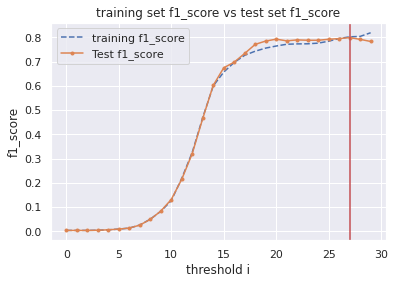

In [94]:
plt.plot(f1sm13[:30], linestyle = '--', label='training f1_score')
plt.plot(f1s_test[:30], marker='.', label='Test f1_score')
plt.xlabel('threshold i')
plt.ylabel('f1_score')
plt.title('training set f1_score vs test set f1_score')
plt.axvline(x=27, color='r', linestyle='-')
plt.legend()
plt.show()


In [95]:
df_testset = X_test1
df_testset['Class'] = y_test

In [96]:
# fraudulent datapoint in test set
print('percentage of fraudulent datapoint', (np.sum(df_testset['Class'] == 1)/df_testset.shape[0])*100, '%')
# non-fraudulent datapoint in test set
print('percentage of non-fraudulent datapoint', (np.sum(df_testset['Class'] == 0)/df_testset.shape[0])*100, '%')

percentage of fraudulent datapoint 0.17204452090867595 %
percentage of non-fraudulent datapoint 99.82795547909133 %


From the above graph, we can see that f1 score for both training set and 
test set are really similar, we don't have either overfitting or underfitting problem in this case. The reason is that the dataset is imblanced, the majority class in training set is non-fraudulent datapoint(99.82694970004614%), and in test set, the majority class is still non-fraudulent datapoint(99.82795547909133%). We used a training dataset which has a majority of non-fraudulent datapoint to train a model, and use this model on test set which also has a majority of non-fraudulent datapoint, the model learns a lot the pattern for non-fraudulent datapoints during training period. Therefore, the training and test accuracy is pretty similar.